# Trabajo Integrador Parte 4

Nombre:

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [2]:
DATASET_PATH = "./data/pokemon/"

In [3]:
my_cols = pd.read_csv(DATASET_PATH + 'columns.csv').column.values.tolist()

my_data = pd.read_csv(DATASET_PATH + 'pokemon.csv',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [4]:
my_data.describe()

name  japanese_name  pokedex_number  percentage_male       type1  \
count  801.000000     801.000000      801.000000       801.000000  801.000000   
mean     1.058365      77.857678     7191.011236        65.362047  428.377029   
std      0.606562      32.158820     6558.220422        19.598948  119.203577   
min      0.250000       5.000000     1280.000000         0.000000  180.000000   
25%      0.500000      55.000000     5120.000000        70.000000  320.000000   
50%      1.000000      75.000000     5120.000000        70.000000  435.000000   
75%      1.000000     100.000000     6400.000000        70.000000  505.000000   
max      4.000000     185.000000    30720.000000       140.000000  780.000000   

         height_m     weight_kg  capture_rate  baseeggsteps  base_happiness  \
count  801.000000  8.010000e+02    781.000000    801.000000      703.000000   
mean    73.008739  1.054996e+06      1.163892     68.958801       55.155761   
std     30.769159  1.602558e+05      1.080326     26.576015       20.261623   
min      5.000000  6.000000e+05      0.100000      1.000000        0.000000   
25%     50.000000  1.000000e+06      0.600000     50.000000       50.000000   
50%     70.000000  1.000000e+06      1.000000     65.000000       50.000000   
75%     90.000000  1.059860e+06      1.500000     80.000000       50.000000   
max    230.000000  1.640000e+06     14.500000    255.000000      100.000000   

        against_?          hp      attack     defense       speed  generation  \
count  801.000000  801.000000  801.000000  801.000000  781.000000  801.000000   
mean   401.000000   71.305868   70.911361   66.334582   61.378105    3.690387   
std    231.373075   32.353826   27.942501   28.907662  109.354766    1.930420   
min      1.000000   10.000000   20.000000    5.000000    0.100000    1.000000   
25%    201.000000   45.000000   50.000000   45.000000    9.000000    2.000000   
50%    401.000000   65.000000   66.000000   65.000000   27.300000    4.000000   
75%    601.000000   91.000000   90.000000   85.000000   64.800000    5.000000   
max    801.000000  194.000000  230.000000  180.000000  999.900000    7.000000   

       is_legendary  
count    801.000000  
mean       0.087391  
std        0.282583  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [46]:
my_data.fillna("none")
pd.options.display.max_columns = None
my_data.head(15)

name  \
['Overgrow', 'Chlorophyll']     1.00 1.0 1.0 0.5 0.5 0.50 2.0 2.0 1.0 0.25 1.0 2.0 1.0 1.0 2.0 1.0 1.0   0.5   
                                                                                                   1.0   0.5   
                                                                                                   1.0   0.5   
['Blaze', 'Solar Power']        0.50 1.0 1.0 1.0 0.5 1.00 0.5 1.0 1.0 0.50 2.0 0.5 1.0 1.0 1.0 2.0 0.5   2.0   
                                                                                                   0.5   2.0   
                                0.25 1.0 1.0 2.0 0.5 0.50 0.5 1.0 1.0 0.25 0.0 1.0 1.0 1.0 1.0 4.0 0.5   2.0   
['Torrent', 'Rain Dish']        1.00 1.0 1.0 2.0 1.0 1.00 0.5 1.0 1.0 2.00 1.0 0.5 1.0 1.0 1.0 1.0 0.5   0.5   
                                                                                                   0.5   0.5   
                                                                                                   0.5   0.5   
['Shield Dust', 'Run Away']     1.00 1.0 1.0 1.0 1.0 0.50 2.0 2.0 1.0 0.50 0.5 1.0 1.0 1.0 1.0 2.0 1.0   1.0   
['Shed Skin']                   1.00 1.0 1.0 1.0 1.0 0.50 2.0 2.0 1.0 0.50 0.5 1.0 1.0 1.0 1.0 2.0 1.0   1.0   
['Compoundeyes', 'Tinted Lens'] 0.50 1.0 1.0 2.0 1.0 0.25 2.0 2.0 1.0 0.25 0.0 2.0 1.0 1.0 1.0 4.0 1.0   1.0   
['Shield Dust', 'Run Away']     0.50 1.0 1.0 1.0 0.5 0.25 2.0 2.0 1.0 0.25 1.0 1.0 1.0 0.5 2.0 2.0 1.0   1.0   
['Shed Skin']                   0.50 1.0 1.0 1.0 0.5 0.25 2.0 2.0 1.0 0.25 1.0 1.0 1.0 0.5 2.0 2.0 1.0   1.0   
['Swarm', 'Sniper']             0.50 1.0 1.0 1.0 0.5 0.25 2.0 2.0 1.0 0.25 1.0 1.0 1.0 0.5 2.0 2.0 1.0   1.0   

                                                                                                        japanese_name  \
['Overgrow', 'Chlorophyll']     1.00 1.0 1.0 0.5 0.5 0.50 2.0 2.0 1.0 0.25 1.0 2.0 1.0 1.0 2.0 1.0 1.0             49   
                                                                                                   1.0             62   
                                                                                                   1.0            100   
['Blaze', 'Solar Power']        0.50 1.0 1.0 1.0 0.5 1.00 0.5 1.0 1.0 0.50 2.0 0.5 1.0 1.0 1.0 2.0 0.5             52   
                                                                                                   0.5             64   
                                0.25 1.0 1.0 2.0 0.5 0.50 0.5 1.0 1.0 0.25 0.0 1.0 1.0 1.0 1.0 4.0 0.5            104   
['Torrent', 'Rain Dish']        1.00 1.0 1.0 2.0 1.0 1.00 0.5 1.0 1.0 2.00 1.0 0.5 1.0 1.0 1.0 1.0 0.5             48   
                                                                                                   0.5             63   
                                                                                                   0.5            103   
['Shield Dust', 'Run Away']     1.00 1.0 1.0 1.0 1.0 0.50 2.0 2.0 1.0 0.50 0.5 1.0 1.0 1.0 1.0 2.0 1.0             30   
['Shed Skin']                   1.00 1.0 1.0 1.0 1.0 0.50 2.0 2.0 1.0 0.50 0.5 1.0 1.0 1.0 1.0 2.0 1.0             20   
['Compoundeyes', 'Tinted Lens'] 0.50 1.0 1.0 2.0 1.0 0.25 2.0 2.0 1.0 0.25 0.0 2.0 1.0 1.0 1.0 4.0 1.0             45   
['Shield Dust', 'Run Away']     0.50 1.0 1.0 1.0 0.5 0.25 2.0 2.0 1.0 0.25 1.0 1.0 1.0 0.5 2.0 2.0 1.0             35   
['Shed Skin']                   0.50 1.0 1.0 1.0 0.5 0.25 2.0 2.0 1.0 0.25 1.0 1.0 1.0 0.5 2.0 2.0 1.0             25   
['Swarm', 'Sniper']             0.50 1.0 1.0 1.0 0.5 0.25 2.0 2.0 1.0 0.25 1.0 1.0 1.0 0.5 2.0 2.0 1.0            150   

                                                                                                        pokedex_number  \
['Overgrow', 'Chlorophyll']     1.00 1.0 1.0 0.5 0.5 0.50 2.0 2.0 1.0 0.25 1.0 2.0 1.0 1.0 2.0 1.0 1.0            5120   
                                                                                                   1.0            5120   
        

In [37]:
numerical_features = [
    "pokedex_number", "percentage_male", "height_m", "weight_kg", "capture_rate",
    "baseeggsteps", "base_happiness", "hp", "attack", "defense",
     "speed", "generation"
]

categorical_features = [
    "name", "japanese_name", "type1", "type2", "classification", "abilities", 
    "sp_attack", "sp_defense","experience_growth", "against_?"
]
target = "is_legendary"

Una vez separadas las variables por tipo, podemos empezar el analisis. Lo primero es binarizar a la variable target

In [38]:
my_data[target].value_counts()

is_legendary
0    731
1     70
Name: count, dtype: int64

In [39]:
y = my_data[target].values

In [40]:
not_legendary_mask = y == 0
legendary_mask = y > 0

In [41]:
y_class = y.copy()

y_class[not_legendary_mask] = 0
y_class[legendary_mask] = 1

In [42]:
y_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [43]:
pd.get_dummies(my_data[categorical_features])

name  \
['Overgrow', 'Chlorophyll'] 1.00 1.0 1.0 0.5 0.5 0.5 2.0 2.0 1.0 0.25 1.0 2.0 1.0 1.0 2.0 1.0 1.0   0.5   
                                                                                              1.0   0.5   
                                                                                              1.0   0.5   
['Blaze', 'Solar Power']    0.50 1.0 1.0 1.0 0.5 1.0 0.5 1.0 1.0 0.50 2.0 0.5 1.0 1.0 1.0 2.0 0.5   2.0   
                                                                                              0.5   2.0   
...                                                                                                 ...   
['Beast Boost']             0.25 1.0 0.5 2.0 0.5 1.0 2.0 0.5 1.0 0.25 0.0 1.0 0.5 0.0 0.5 1.0 0.5   1.0   
                            1.00 1.0 0.5 0.5 0.5 2.0 4.0 1.0 1.0 0.25 1.0 1.0 0.5 0.0 0.5 0.5 0.5   0.5   
                            2.00 0.5 2.0 0.5 4.0 2.0 0.5 1.0 0.5 0.50 1.0 2.0 1.0 1.0 0.0 1.0 1.0   0.5   
['Prism Armor']             2.00 2.0 1.0 1.0 1.0 0.5 1.0 1.0 2.0 1.00 1.0 1.0 1.0 1.0 0.5 1.0 1.0   1.0   
['Soul-Heart']              0.25 0.5 0.0 1.0 0.5 1.0 2.0 0.5 1.0 0.50 2.0 0.5 0.5 0.0 0.5 0.5 1.0   1.0   

                                                                                                   japanese_name  \
['Overgrow', 'Chlorophyll'] 1.00 1.0 1.0 0.5 0.5 0.5 2.0 2.0 1.0 0.25 1.0 2.0 1.0 1.0 2.0 1.0 1.0             49   
                                                                                              1.0             62   
                                                                                              1.0            100   
['Blaze', 'Solar Power']    0.50 1.0 1.0 1.0 0.5 1.0 0.5 1.0 1.0 0.50 2.0 0.5 1.0 1.0 1.0 2.0 0.5             52   
                                                                                              0.5             64   
...                                                                                                          ...   
['Beast Boost']             0.25 1.0 0.5 2.0 0.5 1.0 2.0 0.5 1.0 0.25 0.0 1.0 0.5 0.0 0.5 1.0 0.5            101   
                            1.00 1.0 0.5 0.5 0.5 2.0 4.0 1.0 1.0 0.25 1.0 1.0 0.5 0.0 0.5 0.5 0.5            181   
                            2.00 0.5 2.0 0.5 4.0 2.0 0.5 1.0 0.5 0.50 1.0 2.0 1.0 1.0 0.0 1.0 1.0            101   
['Prism Armor']             2.00 2.0 1.0 1.0 1.0 0.5 1.0 1.0 2.0 1.00 1.0 1.0 1.0 1.0 0.5 1.0 1.0            107   
['Soul-Heart']              0.25 0.5 0.0 1.0 0.5 1.0 2.0 0.5 1.0 0.50 2.0 0.5 0.5 0.0 0.5 0.5 1.0             95   

                                                                                                   type1  \
['Overgrow', 'Chlorophyll'] 1.00 1.0 1.0 0.5 0.5 0.5 2.0 2.0 1.0 0.25 1.0 2.0 1.0 1.0 2.0 1.0 1.0    318   
                                                                                              1.0    405   
                                                                                              1.0    625   
['Blaze', 'Solar Power']    0.50 1.0 1.0 1.0 0.5 1.0 0.5 1.0 1.0 0.50 2.0 0.5 1.0 1.0 1.0 2.0 0.5    309   
                                                                                              0.5    405   
...                                                                                                  ...   
['Beast Boost']             0.25 1.0 0.5 2.0 0.5 1.0 2.0 0.5 1.0 0.25 0.0 1.0 0.5 0.0 0.5 1.0 0.5    570   
                            1.00 1.0 0.5 0.5 0.5 2.0 4.0 1.0 1.0 0.25 1.0 1.0 0.5 0.0 0.5 0.5 0.5    570   
                            2.00 0.5 2.0 0.5 4.0 2.0 0.5 1.0 0.5 0.50 1.0 2.0 1.0 1.0 0.0 1.0 1.0    570   
['Prism Armor']             2.00 2.0 1.0 1.0 1.0 0.5 1.0 1.0 2.0 1.00 1.0 1.0 1.0 1.0 0.5 1.0 1.0    600   
['Soul-Heart']              0.25 0.5 0.0 1.0 0.5 1.0 2.0 0.5 1.0 0.50 2.0 0.5 0.5 0.0 0.5 0.5 1.0    600   

                                                                                                   against_?  \
['Overgrow',

In [44]:
pca = PCA(n_components=0.9).fit(my_data[numerical_features])

pca.n_components_

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [22]:
X_transformed = pca.transform(my_data[numerical_features])

NameError: name 'pca' is not defined

In [23]:
X_transformed

array([[ 4.15197276e+01,  6.04359951e+01],
       [-1.75994017e+01,  3.01920764e+01],
       [ 2.12973462e+00, -5.45861630e+01],
       [-4.34743454e+01, -3.24753433e+01],
       [-1.15270317e+01, -3.99676683e+01],
       [ 2.18359694e+01, -1.36251712e+01],
       [ 1.06416100e+02, -2.03988377e+01],
       [ 7.52203752e+00,  4.50457172e+00],
       [-4.33295298e+01, -6.79174957e+00],
       [-5.40858010e+01,  3.61377300e+00],
       [ 4.76163183e+01, -4.88514137e+00],
       [ 9.29523476e+00,  1.06638337e+01],
       [ 1.50008069e+01, -3.47313944e+01],
       [-4.58080508e+01, -1.54606005e+01],
       [-7.77844491e+01, -3.21393208e+01],
       [-1.92309131e+01, -2.71659586e+01],
       [-7.41691526e+00, -1.42000964e+01],
       [ 2.79752555e+01,  1.36751141e+01],
       [ 1.87164266e+01, -3.09825000e+01],
       [-3.63354231e+01,  8.63630131e+00],
       [ 3.71347167e+01, -1.67444313e+01],
       [ 3.66305869e+01, -1.51122588e+01],
       [-2.27632860e+01, -3.20576672e+01],
       [-4.

<Axes: >

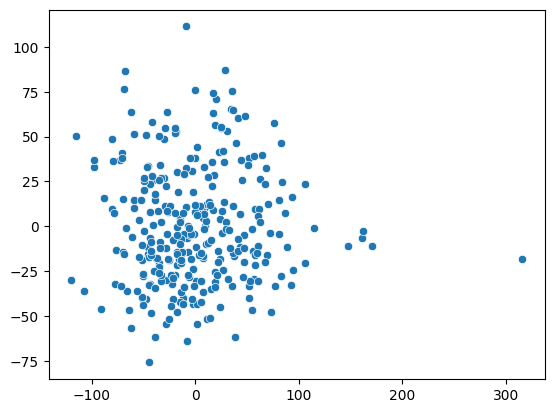

In [25]:
sns.scatterplot(x=X_transformed[:,0], y=X_transformed[:,1])

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [ ]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression